#📌 Extracão

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json (url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação
Nessa etapa relizamos a limpeza e transformação dos dados do DataFrame.

Normalizando os dados das colunas `customer, internet, accouint e phone` a fim de obter dados para análise.

In [93]:
df = pd.concat([
    df.drop(['customer','phone','internet','account'], axis=1),
    pd.json_normalize(df['customer']),
    pd.json_normalize(df['internet']),
    pd.json_normalize(df['account']),
    pd.json_normalize(df['phone'])
], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes,No


Verificando os tipos de dados do DataFrame

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


Verificou-se que há dados do tipo inteiro, float e object (string).  

### Verificando inconsistências no DataFrame.

Verificando se há linhas duplicadas no DataFrame.

In [95]:
df['customerID'].is_unique

True

Contagem de linhas vazias no DataFrame

In [96]:
(df['Churn'].str.strip() == '').sum()

np.int64(224)

Apagando as linhas vazias na variável `Churn`

In [97]:
linhas_vazias = df[df['Churn'].str.strip() == '']
linhas_vazias

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
30,0047-ZHDTW,,Female,0,No,No,11,Fiber optic,Yes,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3,Yes,Yes
75,0120-YZLQA,,Male,0,No,No,71,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1,Yes,No
96,0154-QYHJU,,Male,0,No,No,29,DSL,Yes,Yes,...,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2,Yes,No
98,0162-RZGMZ,,Female,1,No,No,5,DSL,Yes,Yes,...,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,Yes,No
175,0274-VVQOQ,,Male,1,Yes,No,65,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,DSL,No,Yes,...,No,No,No,One year,Yes,Mailed check,54.25,773.2,Yes,Yes
7180,9872-RZQQB,,Female,0,Yes,No,49,DSL,Yes,No,...,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,No,No phone service
7211,9920-GNDMB,,Male,0,No,No,9,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,Yes,Yes
7239,9955-RVWSC,,Female,0,Yes,Yes,67,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9,Yes,No


Fazendo o tratamento numérico das colunas `Charges.Monthly` e `Charges.Total`.

In [98]:
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

Criando a coluna `Conta_Diarias`.

In [99]:
df['Contas_Diarias'] = df['Charges.Monthly'] / df['Charges.Total']
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,Yes,No,0.110568
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,Yes,Yes,0.110435
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No,0.263130
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No,0.079170
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes,No,0.313762


#📊 Carga e análise

## Análise Descritiva

Análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes da TelecomX a partir das variáveis numéricas.

In [109]:
df[['tenure','SeniorCitizen','Charges.Monthly','Charges.Total' ,'Contas_Diarias']].describe()


,tenure,SeniorCitizen,Charges.Monthly,Charges.Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7256.000000,7256.000000
mean,32.346498,0.162653,64.720098,2280.634213,0.157971
std,24.571773,0.369074,30.129572,2268.632997,0.281714
min,0.000000,0.000000,18.250000,18.800000,0.012604
25%,9.000000,0.000000,35.425000,400.225000,0.018092
50%,29.000000,0.000000,70.300000,1391.000000,0.034697
75%,55.000000,0.000000,89.875000,3785.300000,0.114609
max,72.000000,1.000000,118.750000,8684.800000,1.000000


## Contagem dos valores das variáveis categóricas.

In [101]:
contagem_colunas = ['Churn', 'gender', 'Partner', 'Dependents', 'InternetService','OnlineSecurity' ,'PhoneService', 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',  'MultipleLines' ]

for col in contagem_colunas:
  print(f"Contagem de valores para a coluna: {col}")
  print(df[col].value_counts())
  print("-" * 30) # Printar um sepador para melhor visualização.

Contagem de valores para a coluna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
------------------------------
Contagem de valores para a coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64
------------------------------
Contagem de valores para a coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64
------------------------------
Contagem de valores para a coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
------------------------------
Contagem de valores para a coluna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
------------------------------
Contagem de valores para a coluna: OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64
------------------------------
Contagem de valores para a coluna: PhoneService
PhoneService
Yes

Neste passo, o objetivo é entender como a variável "churn" (evasão) está distribuída entre os clientes.

Calculando a porcentagem de evasão a partir da coluna 'Churn'.  

In [102]:
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


Plotando grafico a partir dos dados apresentados na célula anterior.

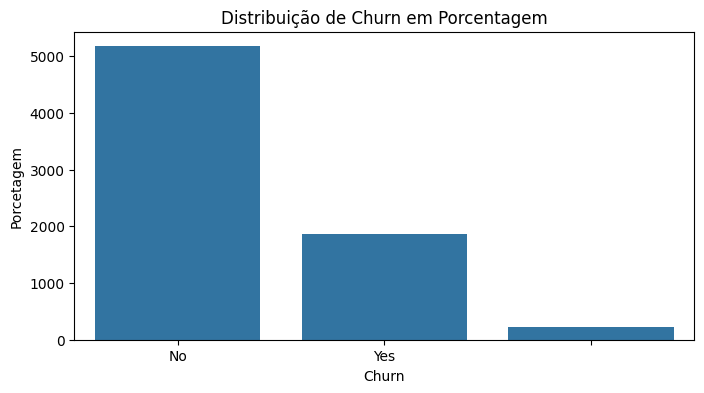

In [103]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn em Porcentagem')
plt.xlabel('Churn')
plt.ylabel('Porcetagem')
plt.show()


Análise do Churn à luz de variáveis categóricas como 'gender', 'Contract', 'PaymentMethod'

In [104]:
contagem = pd.crosstab(df['gender'], df['Churn'])

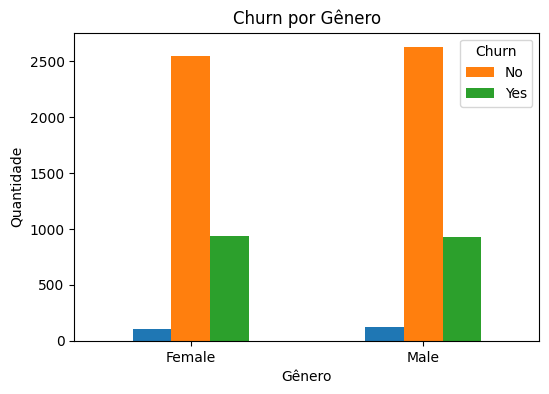

In [84]:
contagem.plot(kind='bar', figsize=(6,4))
plt.title('Churn por Gênero')
plt.ylabel('Quantidade')
plt.xlabel('Gênero')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

In [85]:
contagem = pd.crosstab(df['Contract'], df['Churn'])

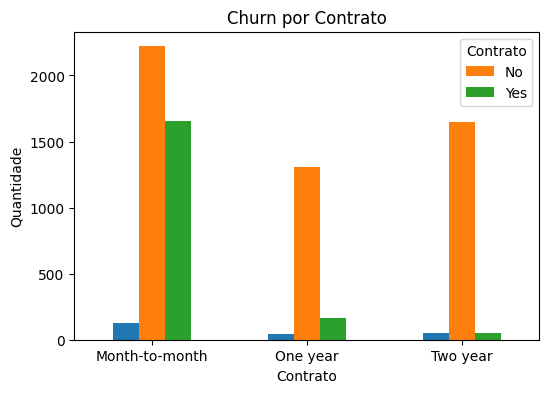

In [86]:
contagem.plot(kind='bar', figsize=(6,4))
plt.title('Churn por Contrato')
plt.ylabel('Quantidade')
plt.xlabel('Contrato')
plt.xticks(rotation=0)
plt.legend(title='Contrato')
plt.show()

In [87]:
contagem = pd.crosstab(df['PaymentMethod'], df['Churn'])

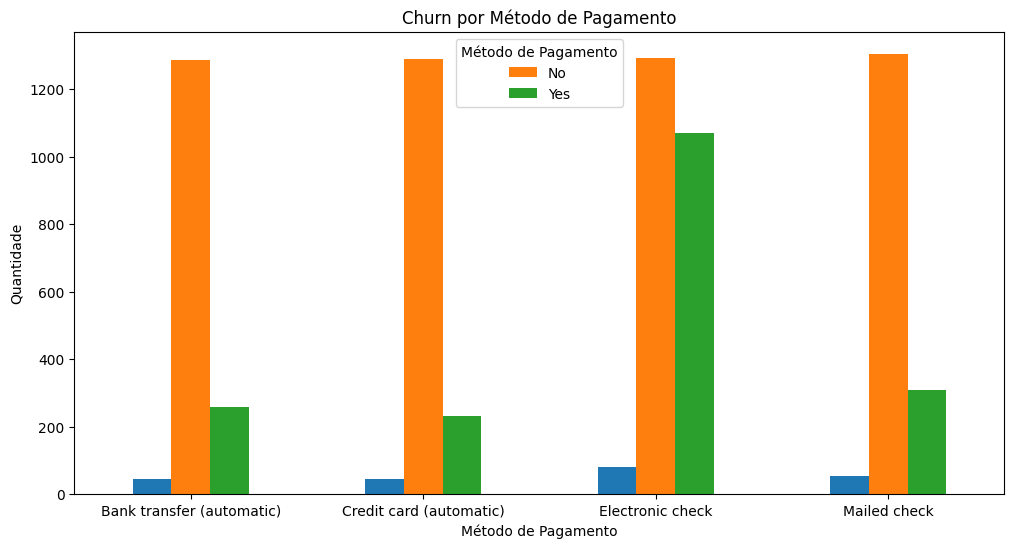

In [90]:
ax = contagem.plot(kind='bar', figsize=(12,6))
plt.title('Churn por Método de Pagamento')
plt.ylabel('Quantidade')
plt.xlabel('Método de Pagamento')
plt.xticks(rotation=0)
plt.legend(title='Método de Pagamento')

plt.show()

Análise do Chur à luz das variáveis numéricas tenure, SeniorCitizen, Charges.Monthly, Charges.Total,Contas_Diarias.

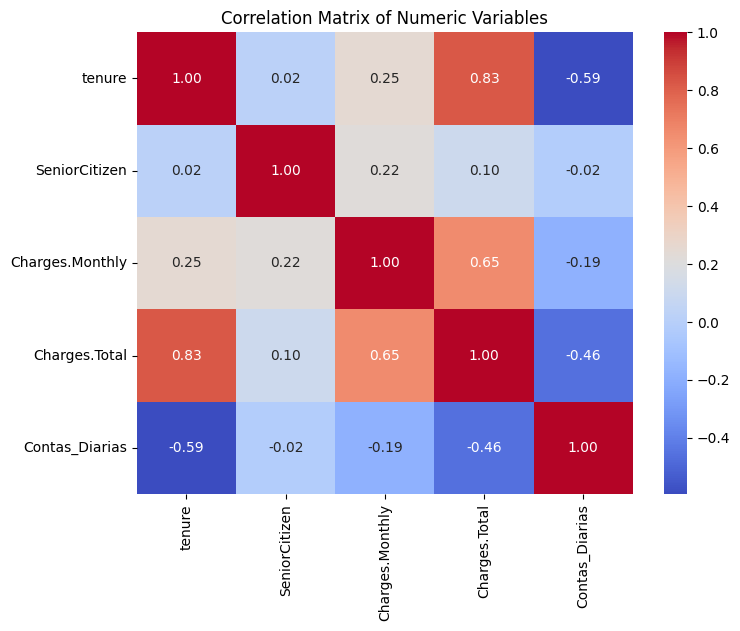

In [119]:
numeric_cols = ['tenure', 'SeniorCitizen', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

#📄Relatório Final

### Introdução
Este estudo teve como objetivo analisar os padrões de evasão (churn) dos clientes da TelecomX, visando identificar fatores que contribuem para a saída de clientes e propor estratégias de retenção.

### Limpeza e Tratamento de Dados
1. Importação dos dados via API JSON
2. Normalização das colunas aninhadas (customer, phone, internet, account)
3. Remoção de duplicatas
4. Conversão apropriada dos tipos de dados
5. Criação da coluna de custos diários

### Análise Exploratória

#### Visão Geral

*  Taxa de Evasão: 25.72% dos clientes cancelaram o serviço
*  Taxa de Retenção: 71.20% permaneceram como clientes

#### Perfil dos Clientes
* Tempo médio de permanência: 32.3 meses
* Valor médio da conta mensal: R$ 64.72
* 16.3% são clientes idosos

### Análise das variáveis categóricas.

#### Gênero

* O número total de clientes Male (Homem) e Female(Mulher) é bastante similar.

* A quantidade de clientes ativos (“No”) é substancialmente maior que a de churn (“Yes”).

* A diferença entre “Yes” e “No” é semelhante para ambos os gêneros, sugerindo ausência de viés de evasão por gênero.

* Pelo tamanho das barras, a taxa de churn para Female e Male parece estar entre 26% e 28% do total de cada grupo.

* Não há diferença visualmente significativa entre os gêneros nesse indicador.


#### Contrato

* O tipo de contrato Month-to-month apresenta o maior número absoluto de churn e também uma proporção muito alta de cancelamentos em relação ao total.

* Contratos de One year e Two year têm churn muito menor, tanto em números absolutos quanto proporcionais.

* O contrato Two year é o que tem a menor taxa de churn no conjunto.

#### Método de pagamento

* Existe associação significativa entre método de pagamento e probabilidade de churn: métodos automáticos estão ligados a menor evasão.

* O Electronic check possivelmente está associado a um perfil de cliente menos fidelizado ou mais sensível a preço/qualidade, o que eleva a taxa de cancelamento.

### Análise das variáveis numéricas a partir da matriz de correlação.

#### Principais relações encontradas

* Quanto maior o tempo de permanência, maior o total gasto pelo cliente.

* Relação esperada, já que clientes antigos acumulam mais cobranças.

* Clientes com mensalidades mais altas tendem a ter um gasto total maior.

* Pequena tendência de clientes antigos pagarem mensalidades um pouco maiores.

* Clientes com mais tempo de permanência tendem a ter menos contas diárias (possivelmente menos solicitações de suporte ou ocorrências).

* Clientes que gastam mais no total costumam ter menos registros diários (possível sinal de estabilidade).

* Idade avançada não mostra relação clara com gastos, tempo de permanência ou contas diárias.

### Conclusões e Insights

#### Conclusões gerais
* A taxa de evasão de 25.72% é considerada alta para o setor
* Mais da metade dos clientes (55.1%) opta por contratos mensais.

#### Quanto ao gênero

* O gênero não parece ser um preditor relevante para churn neste conjunto de dados.

#### Quanto ao contrato
* Há uma forte relação entre tempo de contrato e probabilidade de churn:

* Quanto mais longo o contrato, menor a chance de cancelamento.

* Isso sugere que contratos mais longos estão associados a maior fidelização, possivelmente devido a:

* Descontos ou benefícios para contratos longos.

* Barreiras de saída (custos de cancelamento, compromissos contratuais).

#### Quanto ao método de pagamento

* Electronic check parece ter uma taxa de churn próxima de 40% a 45%.

* Os demais métodos (Bank transfer, Credit card, Mailed check) parecem ter churn abaixo de 20%.
#### Quanto a matriz de correlação

* Padrão geral: Clientes mais antigos (alto tenure) têm gasto total muito maior e apresentam menos ocorrências diárias.

* SeniorCitizen: A variável “ser idoso” não é um fator relevante nas relações numéricas diretas.

* Indício de fidelização: Correlação negativa entre tenure e Contas_Diarias sugere que clientes mais antigos são mais estáveis e menos problemáticos.

### Recomendações
1. Incentivo a Contratos Longos: Desenvolver programas de fidelidade para migração de contratos mensais para anuais;
2. Foco em Retenção: Criar estratégias específicas para clientes nos primeiros 32 meses;
3. Segmentação por Idade: Desenvolver pacotes específicos para o público idoso;
4. Qualidade do Serviço: Priorizar a manutenção da qualidade da fibra ótica;
5. Precificação Estratégica: Avaliar a política de preços considerando o ticket médio de R$ 64.72;

### Próximos Passos
1. Implementar sistema de alerta precoce para clientes com alto risco de evasão;
2. Desenvolver modelos preditivos de churn
Realizar pesquisas qualitativas com clientes que cancelaram o serviço.